# Recurrent models

In this notebook we train several recurrent networks and evaluate their accuracy for the stated problem (classification of EEG signals).

In [1]:
%cd ..

/home/quentin/Documents/Courses/Deep learning/Projects/project1/src


In [2]:
import numpy as np

from utils.loading import load_data, save_obj, load_obj

import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

from utils.cross_validation import early_stopping
from utils.cross_validation import cross_validation

from utils.visualization import plot_history

In [3]:
one_khz = False

x_train, y_train = load_data(one_khz=one_khz)
x_test, y_test = load_data(train=False, one_khz=one_khz)

## Tests

In [6]:
from rec_models import BasicLSTM

In [8]:
model = BasicLSTM(50, 2)
history = model.fit(x_train, y_train, x_test, y_test, epochs=1, lr=5*1e-5, batch_size=16,
                    standardize=True, noise=2, crop=False, init_hidden='init_hidden')
plot_history(history)

x  torch.Size([16, 28, 50])
lstm out  torch.Size([16, 28, 2])


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f7dcb5884e0>>
Traceback (most recent call last):
  File "/home/quentin/miniconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 349, in __del__
    self._shutdown_workers()
  File "/home/quentin/miniconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 328, in _shutdown_workers
    self.worker_result_queue.get()
  File "/home/quentin/miniconda3/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/quentin/miniconda3/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/quentin/miniconda3/lib/python3.6/multiprocessing/resource_sharer.py", line 58, in detach
    return reduction.recv_handle(conn)
  File "/home/quentin/miniconda3/lib/python3.6/multiprocessing/reduction.py", line 182, in recv_handle


RuntimeError: invalid argument 2: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Call .contiguous() before .view(). at /opt/conda/conda-bld/pytorch-cpu_1524582300956/work/aten/src/TH/generic/THTensor.cpp:280

In [44]:
from rec_models import RNN

In [45]:
sequence_length = 28
input_size = 50
hidden_size =10
num_layers = 2
num_classes = 2
batch_size = 79
learning_rate = 0.01

rnn = RNN(input_size, hidden_size, num_layers, num_classes)

x  torch.Size([16, 28, 50])
h0  torch.Size([2, 16, 10])
out[:, -1, :]  torch.Size([16, 10])
x  torch.Size([16, 28, 50])
h0  torch.Size([2, 16, 10])
out[:, -1, :]  torch.Size([16, 10])
x  torch.Size([16, 28, 50])
h0  torch.Size([2, 16, 10])
out[:, -1, :]  torch.Size([16, 10])
x  torch.Size([16, 28, 50])
h0  torch.Size([2, 16, 10])
out[:, -1, :]  torch.Size([16, 10])
x  torch.Size([16, 28, 50])
h0  torch.Size([2, 16, 10])
out[:, -1, :]  torch.Size([16, 10])
x  torch.Size([16, 28, 50])
h0  torch.Size([2, 16, 10])
out[:, -1, :]  torch.Size([16, 10])
x  torch.Size([16, 28, 50])
h0  torch.Size([2, 16, 10])
out[:, -1, :]  torch.Size([16, 10])
x  torch.Size([16, 28, 50])
h0  torch.Size([2, 16, 10])
out[:, -1, :]  torch.Size([16, 10])
x  torch.Size([16, 28, 50])
h0  torch.Size([2, 16, 10])
out[:, -1, :]  torch.Size([16, 10])
x  torch.Size([16, 28, 50])
h0  torch.Size([2, 16, 10])
out[:, -1, :]  torch.Size([16, 10])
x  torch.Size([16, 28, 50])
h0  torch.Size([2, 16, 10])
out[:, -1, :]  torch.Siz

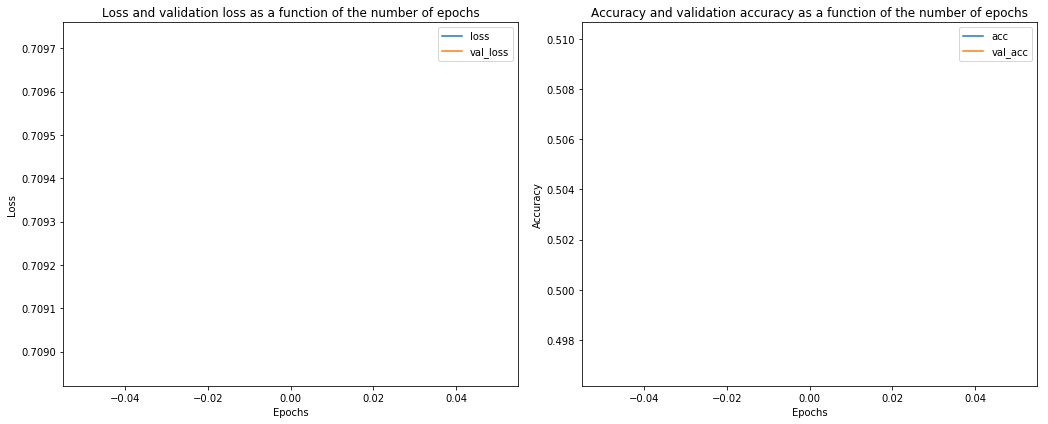

In [46]:
history = rnn.fit(x_train, y_train, x_test, y_test, epochs=1, lr=5*1e-5, batch_size=16,
                    standardize=True, noise=2, crop=False)
plot_history(history)

In [9]:
import torch
import torch.nn as nn
from torch.nn import functional as F

from nnmodel import NNModel

In [10]:
lstm = nn.LSTM(input_size=28, hidden_size=128, num_layers=1, batch_first=True)

In [14]:
x = x_train[0]
x.shape

torch.Size([28, 50])

In [19]:
lstm(x.reshape(50, 1, 28))[0].shape

torch.Size([50, 1, 128])

In [ ]:
# These are just tests at the moment

class BasicLSTM(NNModel):

    def __init__(self, input_size, hidden_size):
        super(BasicLSTM, self).__init__()
        self.hidden_size = hidden_size

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True)

        # The linear layer that maps from hidden state space to tag space
        self.fc = nn.Linear(hidden_size, 2)
        self.hidden = self.init_hidden()

    def init_hidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (torch.zeros(1, 16, self.hidden_size),
                torch.zeros(1, 16, self.hidden_size))

    def forward(self, x):
        print('x ', x.shape)
        x, self.hidden = self.lstm(x, self.hidden)
        print('lstm out ', x.shape)
        x = self.fc(x.view(len(x), -1))
        x = F.softmax(x, dim=0)
        return x
